## welch's method

Trying out different parameters for welch's method

In [2]:
%matplotlib inline

import os
import scipy as sp
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import signal
from scipy import io

##### Import a channel of ECoG data

In [3]:
filename = 'emodat.mat'
filename = os.path.join('/Users/jorge/Dropbox/research/sandbox/voytek-tutorials/', filename)

data_file = sp.io.loadmat(filename)
srate = data_file['srate'][0][0]
data  = data_file['data'][0]

Length of data:   1476035
Sampling rate:    1017.25 Hz
Duration of data: 1451.00 seconds


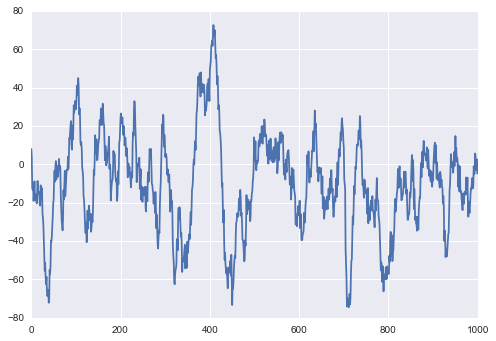

In [4]:
print("Length of data:   {}".format(len(data)))
print("Sampling rate:    {:.2f} Hz".format(srate))
print("Duration of data: {:.2f} seconds".format(len(data) / srate))
plt.plot(data[1000:2000]) # Let's plot about a second of the data

## overlapping and windows
When using Welch's method, we slide several windows across the signal to compute the FFT, and then average all of these together in order to reduce variance and achieve a smooth-looking PSD. Here's we'll see how the size of our window ($R$) influences the PSD. ($L$ is the length of the signal)

We'll be using a **Hamming** window. Let's see what happens when the $R = L$ **(No overlap).**

In [5]:
newsrate = 512
data = sp.signal.resample(data, int(np.floor(len(data)*(newsrate/srate))))

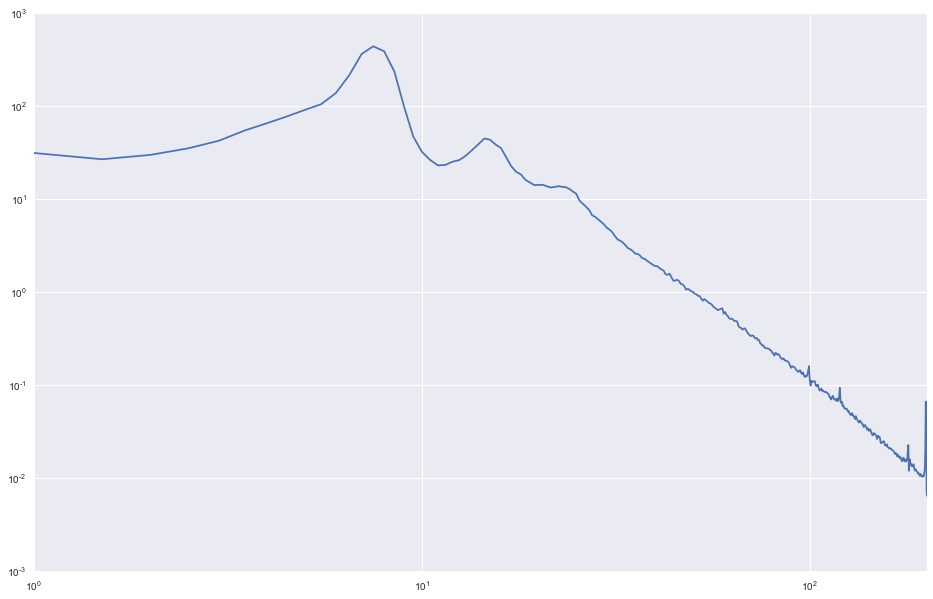

In [6]:
# freqs, PSD = sp.signal.welch(data, fs=512, window='hamming',
#                              noverlap=256//2, nfft=None, detrend='linear', 
#                              return_onesided=True, scaling='density')

f, psd = sp.signal.welch(data, fs=newsrate, nperseg=newsrate*2, window='hanning')

plt.figure(figsize=(16,10))
plt.xlim([1, 200])
plt.loglog(f, psd)

(1, 150)

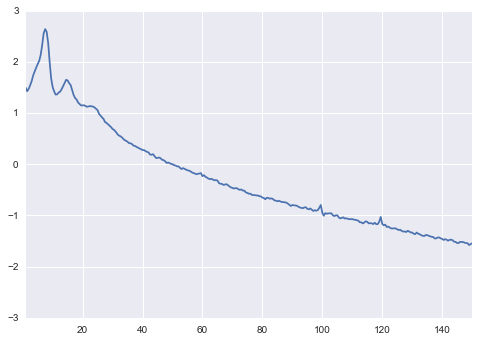

In [7]:
plt.plot(f, np.log10(psd))
plt.xlim([1,150])

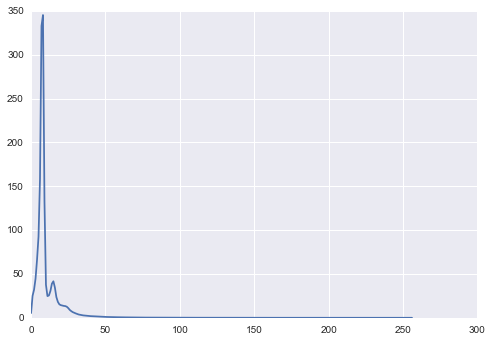

In [8]:
f, psd = sp.signal.welch(data, fs=newsrate, nperseg=newsrate)
plt.plot(f, psd)

(1, 150)

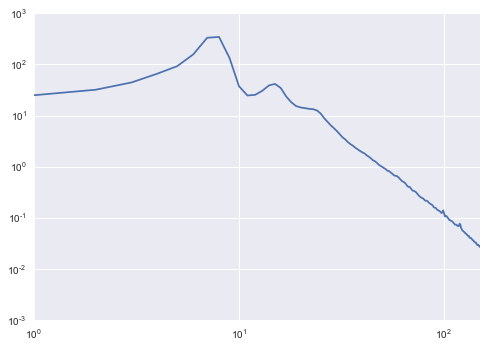

In [9]:
plt.loglog(f, psd)
plt.xlim([1, 150])

In [10]:
srate = newsrate

In [11]:
a = np.arange(0, 40, 10)
print(a)

[ 0 10 20 30]


In [12]:
a = a[:, np.newaxis]
print(a)

[[ 0]
 [10]
 [20]
 [30]]


## example from [stack overflow](http://stackoverflow.com/questions/28298488/efficiently-compute-50hz-content-of-signal)

In [13]:
%matplotlib inline
import os
import numpy as np
import scipy as sp
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.io
import scipy.signal

In [14]:
# generate an example signal
srate = 128.
nsamples = 454812
time = np.arange(nsamples) / srate

# 50 hz signal with some noise
signal = np.sin(2 * np.pi * 50 * time) + np.random.randn(nsamples)

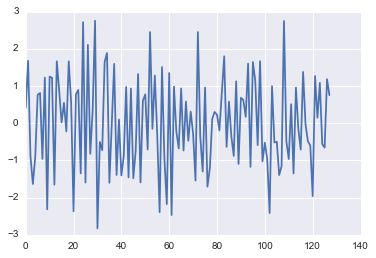

In [15]:
plt.plot(signal[0:128])

In [16]:
# default parameters
fs1, ps1 = sp.signal.welch(signal, srate, nperseg=256, noverlap=128)

# 8x the segment size, keeping proportional overlap over the same
fs2, ps2 = sp.signal.welch(signal, srate, nperseg=2048, noverlap=1024)

# no overlap between segments
fs3, ps3 = sp.signal.welch(signal, srate, nperseg=2048, noverlap=0)

# no overlap, but with default params
fs4, ps4 = sp.signal.welch(signal, srate, nperseg=256, noverlap=0)

(45, 53)

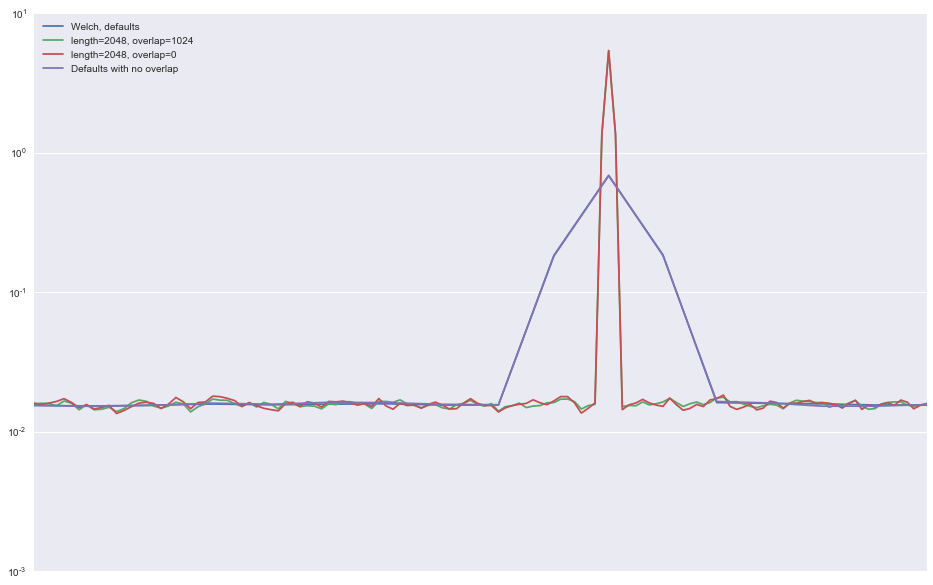

In [17]:
fig, ax1 = plt.subplots(1, 1, figsize=(16,10))
ax1.hold(True)
ax1.loglog(fs1, ps1, label='Welch, defaults')
ax1.loglog(fs2, ps2, label='length=2048, overlap=1024')
ax1.loglog(fs3, ps3, label='length=2048, overlap=0')
ax1.loglog(fs4, ps4, label='Defaults with no overlap')
ax1.legend(loc=2, fancybox=True)
ax1.set_xlim([45, 53])

(45, 53)

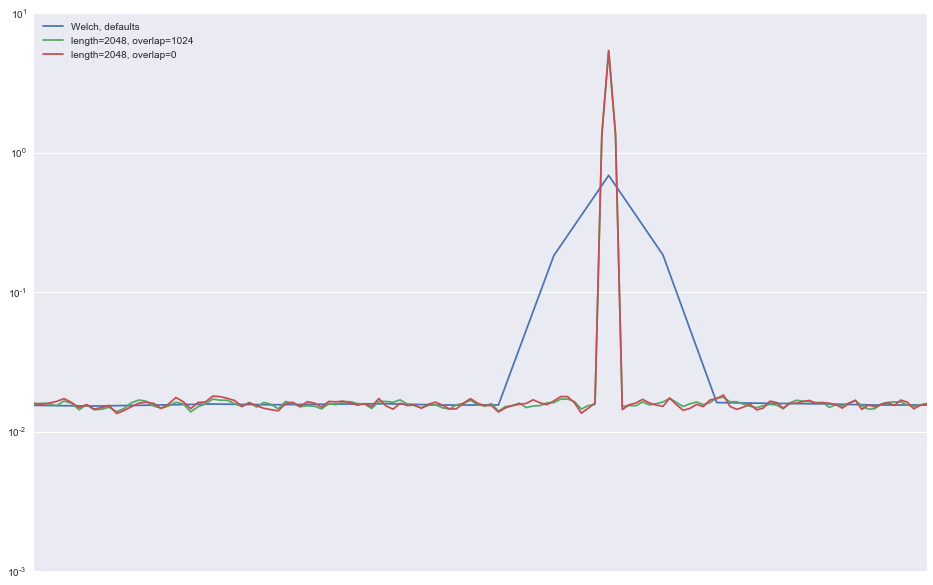

In [18]:
fig, ax1 = plt.subplots(1, 1, figsize=(16,10))
ax1.hold(True)
ax1.loglog(fs1, ps1, label='Welch, defaults')
ax1.loglog(fs2, ps2, label='length=2048, overlap=1024')
ax1.loglog(fs3, ps3, label='length=2048, overlap=0')
# ax1.loglog(fs4, ps4, label='Defaults with no overlap')
ax1.legend(loc=2, fancybox=True)
ax1.set_xlim([45, 53])

## voytek ecog data again

Let's compute the PSD using Welch's method, using the parameters mentioned in his 2015 Aging paper.

In [19]:
filename = 'emodat.mat'
filename = os.path.join('/Users/jorge/Dropbox/research/sandbox/voytek-tutorials/', filename)

data_file = sp.io.loadmat(filename)
srate = data_file['srate'][0][0]
data  = data_file['data'][0]

Length of data:   1476035
Sampling rate:    1017.25 Hz
Duration of data: 1451.00 seconds


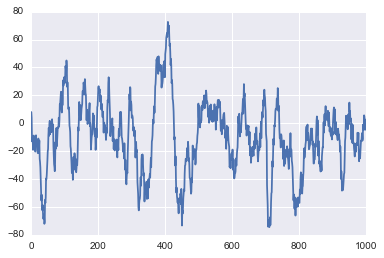

In [20]:
print("Length of data:   {}".format(len(data)))
print("Sampling rate:    {:.2f} Hz".format(np.squeeze(srate)))
print("Duration of data: {:.2f} seconds".format(len(data) / srate))
plt.plot(data[1000:2000]) # Let's plot about a second of the data

In [21]:
# default parameters 
f1, psd1 = sp.signal.welch(data, srate, nperseg=256, noverlap=128)

# 8x the segment size, keeping proportional overlap over the same
f2, psd2 = sp.signal.welch(data, srate, nperseg=2048, noverlap=1024)

# no overlap between segments
f3, psd3 = sp.signal.welch(data, srate, nperseg=2048, noverlap=0)

# parameters used for the ECoG data in Aging 1/f paper:
# - N = 2 s time windows
# - 50 % overlap
# - Hamming window
f4, psd4 = sp.signal.welch(data, srate, nperseg=srate*2, noverlap=srate, window='hamming')

In [22]:
print(f4.shape)
print(psd4.shape)
print(f3.shape)
print(psd3.shape)
print(f2.shape)
print(psd2.shape)

(1018,)
(1018,)
(1025,)
(1025,)
(1025,)
(1025,)


In [23]:
f4[-1]
f4 = np.append(f4, f4[-1])
f4 = np.append(f4, f4[-1])
f4 = np.append(f4, f4[-1])
f4 = np.append(f4, f4[-1])
f4 = np.append(f4, f4[-1])
f4 = np.append(f4, f4[-1])

In [24]:
f4 = np.append(f4, f4[-1])
f4.shape

(1025,)

In [25]:
psd4[-1]
psd4 = np.append(psd4, psd4[-1])
psd4 = np.append(psd4, psd4[-1])
psd4 = np.append(psd4, psd4[-1])
psd4 = np.append(psd4, psd4[-1])
psd4 = np.append(psd4, psd4[-1])
psd4 = np.append(psd4, psd4[-1])

In [26]:
psd4 = np.append(psd4, psd4[-1])
psd4.shape

(1025,)

(1, 200)

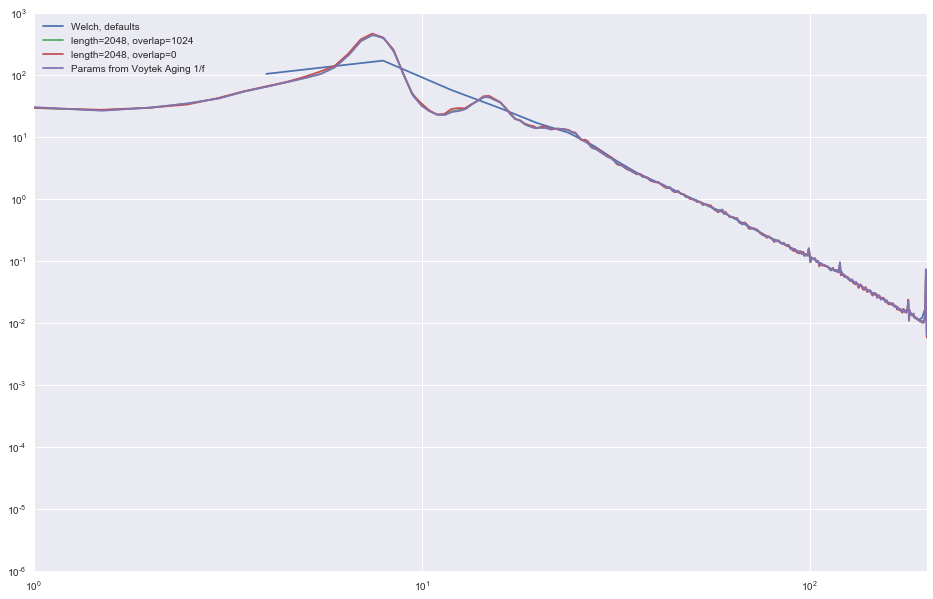

In [27]:
fig, ax1 = plt.subplots(1, 1, figsize=(16,10))
ax1.hold(True)
ax1.loglog(f1, psd1, label='Welch, defaults')
ax1.loglog(f2, psd2, label='length=2048, overlap=1024')
ax1.loglog(f3, psd3, label='length=2048, overlap=0')
ax1.loglog(f4, psd4, label='Params from Voytek Aging 1/f')
ax1.legend(loc=2, fancybox=True)
ax1.set_xlim([1, 200])

## using one of our own participants

In [28]:
filename = '120127163.mat'
filename = os.path.join('/Users/jorge/Dropbox/research/_psd-slope/data/extClfiltCAR-mat/', filename)

data_file = sp.io.loadmat(filename)
srate = data_file['srate'][0][0]
data  = data_file['data'][20]

Length of data:   10240 pts
Sampling rate:    512.00 Hz
Duration of data: 20.00 seconds


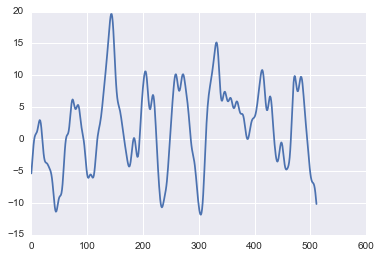

In [29]:
print("Length of data:   {} pts".format(len(data)))
print("Sampling rate:    {:.2f} Hz".format(np.squeeze(srate)))
print("Duration of data: {:.2f} seconds".format(len(data) / srate))
plt.plot(data[512:1024]) # Let's plot about a second of the data

In [30]:
# default parameters 
f1, psd1 = sp.signal.welch(data, srate, nperseg=256, noverlap=128)

# 8x the segment size, keeping proportional overlap over the same
f2, psd2 = sp.signal.welch(data, srate, nperseg=2048, noverlap=1024)

# no overlap between segments
f3, psd3 = sp.signal.welch(data, srate, nperseg=2048, noverlap=0)

# parameters used for the ECoG data in Aging 1/f paper:
# - N = 2 s time windows
# - 50 % overlap
# - Hamming window
f4, psd4 = sp.signal.welch(data, srate, nperseg=srate*2, noverlap=srate//2, window='hamming')

f5, psd5 = sp.signal.welch(data, srate, nperseg=srate*2, noverlap=srate)

(1, 25)

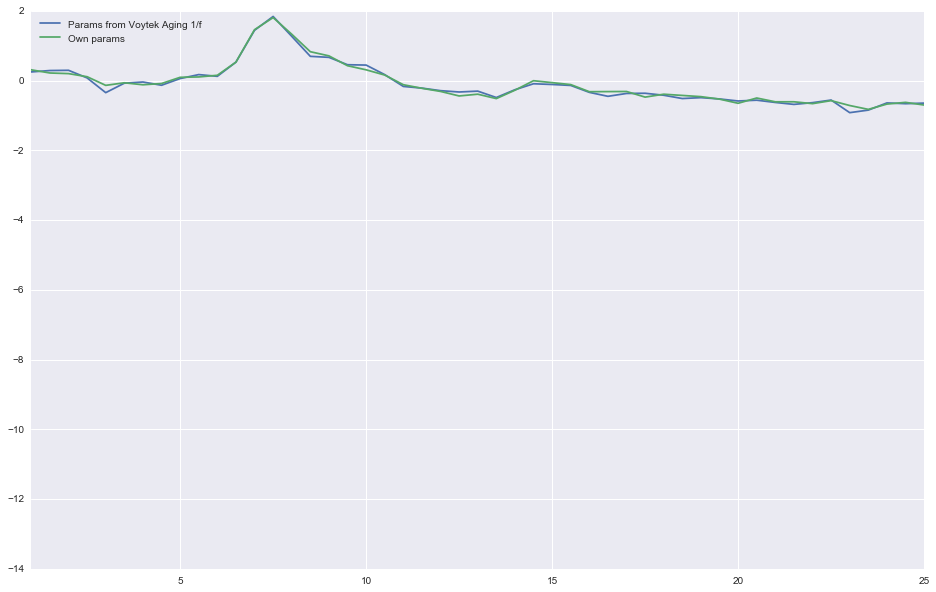

In [31]:
fig, ax1 = plt.subplots(1, 1, figsize=(16,10))
ax1.hold(True)
# ax1.loglog(f1, psd1, label='Welch, defaults')
# ax1.loglog(f2, psd2, label='length=2048, overlap=1024')
# ax1.loglog(f3, psd3, label='length=2048, overlap=0')
ax1.plot(f4, np.log10(psd4), label='Params from Voytek Aging 1/f')
ax1.plot(f5, np.log10(psd5), label='Own params')
ax1.legend(loc=2, fancybox=True)
ax1.set_xlim([1, 25])

##### let's plot the PSD of every single channel in this subject.

Length of data:   10240 pts
Sampling rate:    512.00 Hz
Duration of data: 20.00 seconds


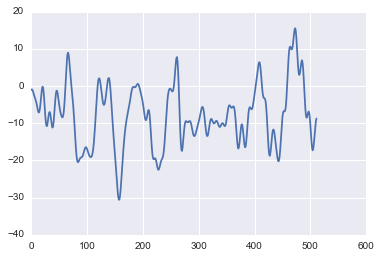

In [32]:
filename = '120127163.mat'
filename = os.path.join('/Users/jorge/Dropbox/research/_psd-slope/data/extClfiltCAR-mat/', filename)

data_file = sp.io.loadmat(filename)
srate = data_file['srate'][0][0]
data  = data_file['data']

print("Length of data:   {} pts".format(len(data[0])))
print("Sampling rate:    {:.2f} Hz".format(np.squeeze(srate)))
print("Duration of data: {:.2f} seconds".format(len(data[0]) / srate))
plt.plot(data[0][512:1024]) # Let's plot about a second of the data

(1, 100)

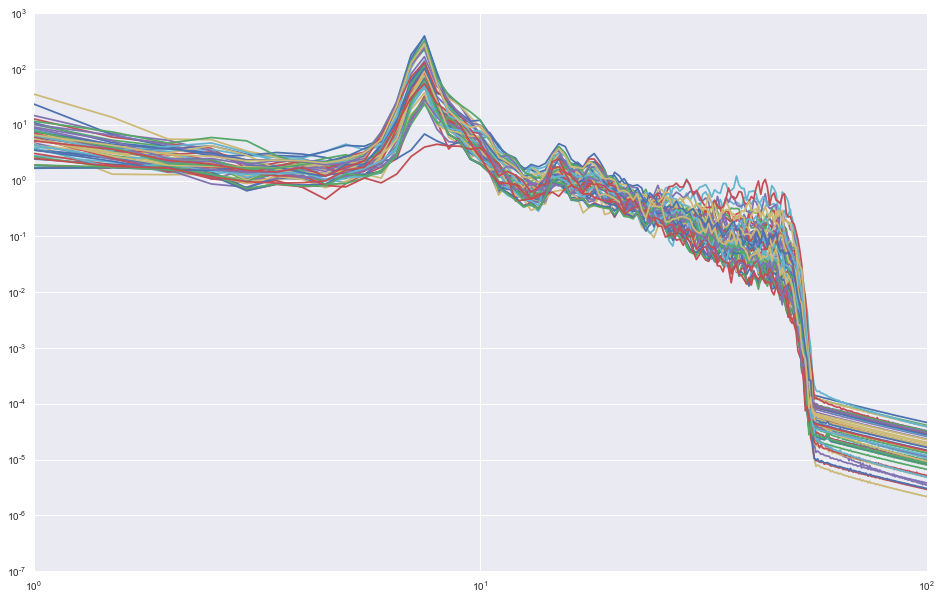

In [33]:
fig, ax1 = plt.subplots(1, 1, figsize=(16, 10))
ax1.hold(True)

for chan in data: # 2 second windows with 50% overlap, hamming window
    f, psd = sp.signal.welch(chan, srate, nperseg=srate*2, noverlap=srate, window='hamming')
    ax1.loglog(f, psd)
ax1.set_xlim([1, 100])

In [34]:
print(psd.shape)
gavg_psd = np.zeros([1025])
print(gavg_psd.shape)
print(data.shape)

(513,)
(1025,)
(53, 10240)


In [35]:
print(len(data))

53


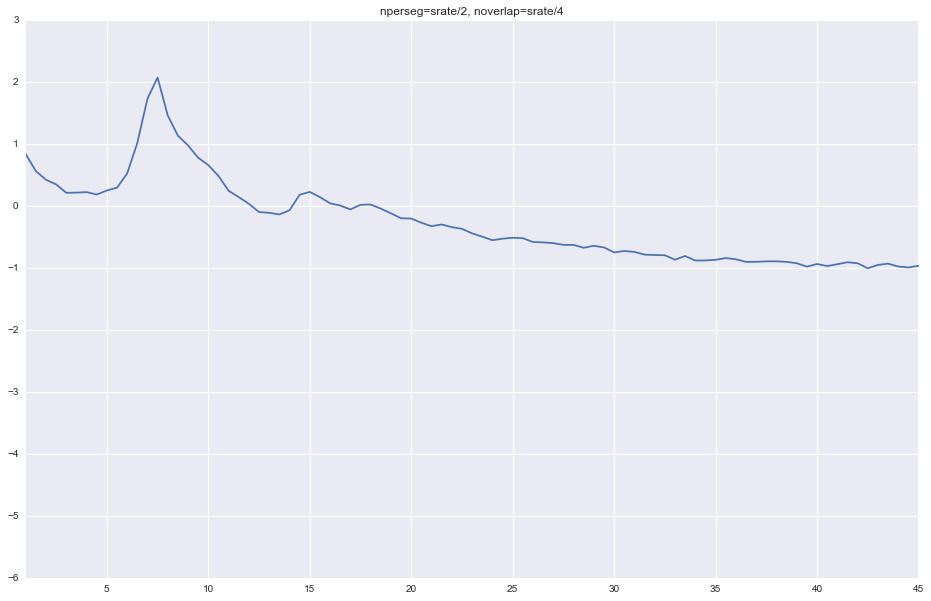

In [39]:
fig, ax1 = plt.subplots(1, 1, figsize=(16, 10))
ax1.hold(True)

gavg_psd = np.zeros([513])

for chan in data:
    f, psd = sp.signal.welch(chan, srate, nperseg=srate*2, noverlap=srate, window='hamming')
    gavg_psd = gavg_psd + psd
gavg_psd = gavg_psd / len(data)

ax1.plot(f, np.log10(gavg_psd))
ax1.set_xlim([1, 45])
ax1.set_title("nperseg=srate/2, noverlap=srate/4")

# for chan in data: # 2 second windows with 50% overlap, hamming window
#     f, psd = sp.signal.welch(chan, srate, nperseg=srate*2, noverlap=0, window='hamming')
#     ax1.loglog(f, psd)
# ax1.set_xlim([1, 45])

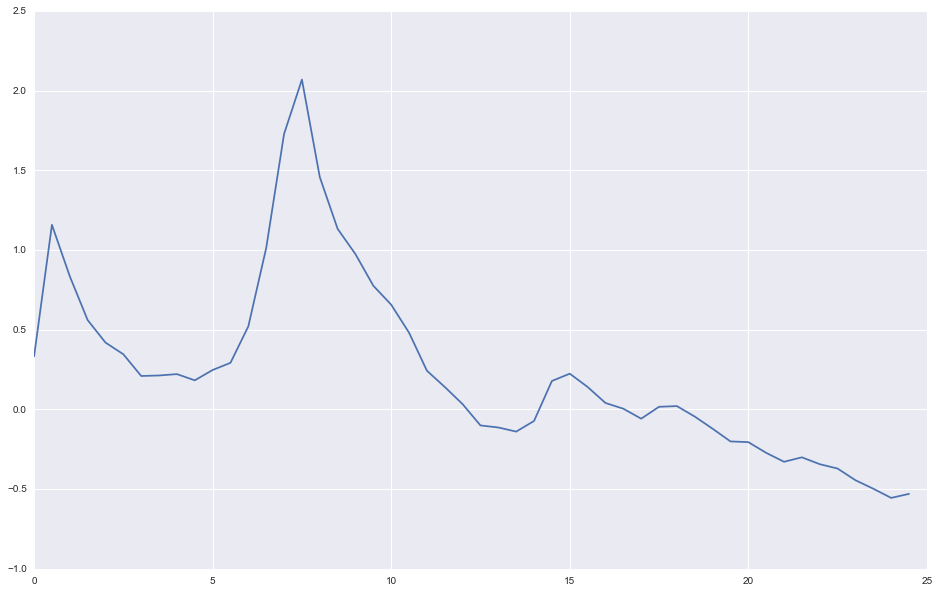

In [40]:
plt.figure(figsize=(16,10))
plt.plot(f[0:25 * 2], np.log10(gavg_psd[0:25 * 2]))

In [41]:
f[200]

100.0